In [1]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
%matplotlib inline

import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant, graphics
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict, Any

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [5]:
DATA_STORE = "../data/linear.h5"

In [104]:
with pd.HDFStore(DATA_STORE) as store:
    data = (store['model_data']
            .dropna()
            .drop(['open', 'close', 'low', 'high'], axis=1))

In [105]:
def get_X_y(data: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    universe = data[data.dollar_vol_rank < 100]
    y = universe.filter(like='target')
    X = universe.drop(y.columns, axis=1)
    return X, y

X, y = get_X_y(data)

In [1]:
data.info()

NameError: name 'data' is not defined

In [108]:
target = 'target_5d'
model = OLS(endog=np.asarray(y[target]), exog=add_constant(np.asarray(X)))
trained_model = model.fit()
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:11:56   Log-Likelihood:             3.7861e+05
No. Observations:              109675   AIC:                        -7.571e+05
Df Residuals:                  109614   BIC:                        -7.565e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.000    -11.162      0.000      -0.005      -0.003
x1         -1.765e-12   1.86e-12     -0.949      0.343   -5.41e-12    1.88e-12
x2          1.738e-14   6.23e-14      0.279      0.780   -1.05e-13    1.39e-13
x3          1.399e-13   7.34e-14      1.905      0.057   -4.03e-15    2.84e-13
x4          2.632e-06   1.07e-06      2.470      0.014    5.44e-07    4.72e-06
x5           4.53e-05   5.26e-06      8.613      0.000     3.5e-05    5.56e-05
x6             0.0243      0.006      4.084      0.000       0.013       0.036
x7            -0.0091      0.006     -1.662      0.096      -0.020       0.002
x8            -0.0002   2.82e-05     -8.326      0.000      -0.000      -0.000
x9            -0.0010   5.67e-05    -17.353      0.000      -0.001      -0.001
x10           -0.0213      0.009     -2.257      0.024      -0.040      -0.003
x11           -0.0009      0.064     -0.014      0.989      -0.127       0.125
x12            0.2287      0.112      2.036      0.042       0.009       0.449
x13            0.0971      0.177      0.549      0.583      -0.250       0.444
x14           -9.1439      1.862     -4.911      0.000     -12.793      -5.495
x15           13.6559      2.861      4.772      0.000       8.048      19.264
x16           -0.0254      0.008     -3.272      0.001      -0.041      -0.010
x17           -0.1101      0.056     -1.980      0.048      -0.219      -0.001
x18            0.3665      0.099      3.700      0.000       0.172       0.561
x19           -0.0787      0.173     -0.454      0.650      -0.418       0.261
x20           -0.0247      0.006     -3.803      0.000      -0.037      -0.012
x21           -0.1820      0.048     -3.824      0.000      -0.275      -0.089
x22           -0.6474      0.227     -2.854      0.004      -1.092      -0.203
x23           -4.6761      0.955     -4.897      0.000      -6.548      -2.805
x24           -0.0237      0.006     -4.207      0.000      -0.035      -0.013
x25           -0.1486      0.048     -3.114      0.002      -0.242      -0.055
x26            0.0780      0.013      5.957      0.000       0.052       0.104
x27           -0.0289      0.006     -4.722      0.000      -0.041      -0.017
x28           -0.0277      0.005     -5.270      0.000      -0.038      -0.017
x29            0.3639      0.113      3.212      0.001       0.142       0.586
x30           -0.0007      0.009     -0.075      0.940      -0.018       0.016
x31            0.0482      0.006      7.639      0.000       0.036       0.061
x32           -0.0043      0.001     -3.119      0.002      -0.007      -0.002
x33            0.3548      0.113      3.133      0.002       0.133       0.577
x34            0.0805      0.008      9.507      0.000       0.064       0.097
x35            0.0441      0.006      7.001      0.000       0.032       0.056
x3

In [109]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


In [110]:
X = add_constant(X)
y = np.dot(X, beta) + e


In [111]:
X.shape, y.shape

((100, 3), (100,))

In [112]:
model = OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.383e+06
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          4.29e-241
Time:                        10:17:51   Log-Likelihood:                -142.17
No. Observations:                 100   AIC:                             290.3
Df Residuals:                      97   BIC:                             298.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8693      0.299      2.903      0.0

In [93]:
results.params

array([ 1.24703772,  0.04839221, 10.00137247])

In [89]:
list(np.dot(results.params, X[i]) for i in range(100))

[1.247037715152377,
 1.3539702260401243,
 1.6649915538605649,
 2.180101698613699,
 2.8993006602995264,
 3.8225884389180473,
 4.949965034469262,
 6.281430446953168,
 7.816984676369769,
 9.556627722719062,
 11.500359586001053,
 13.648180266215734,
 16.000089763363107,
 18.556088077443174,
 21.316175208455935,
 24.280351156401387,
 27.448615921279536,
 30.820969503090375,
 34.39741190183391,
 38.17794311751014,
 42.16256315011907,
 46.35127199966067,
 50.74406966613499,
 55.34095614954198,
 60.14193144988168,
 65.14699556715406,
 70.35614850135916,
 75.76939025249692,
 81.38672082056739,
 87.20814020557054,
 93.2336484075064,
 99.46324542637494,
 105.8969312621762,
 112.53470591491015,
 119.37656938457675,
 126.42252167117609,
 133.6725627747081,
 141.1266926951728,
 148.7849114325702,
 156.6472189869003,
 164.7136153581631,
 172.98410054635852,
 181.45867455148672,
 190.1373373735476,
 199.0200890125412,
 208.10692946846737,
 217.39785874132636,
 226.89287683111803,
 236.59198373784238,


In [85]:
results.predict()

array([   1.24703772,    1.35397023,    1.66499155,    2.1801017 ,
          2.89930066,    3.82258844,    4.94996503,    6.28143045,
          7.81698468,    9.55662772,   11.50035959,   13.64818027,
         16.00008976,   18.55608808,   21.31617521,   24.28035116,
         27.44861592,   30.8209695 ,   34.3974119 ,   38.17794312,
         42.16256315,   46.351272  ,   50.74406967,   55.34095615,
         60.14193145,   65.14699557,   70.3561485 ,   75.76939025,
         81.38672082,   87.20814021,   93.23364841,   99.46324543,
        105.89693126,  112.53470591,  119.37656938,  126.42252167,
        133.67256277,  141.1266927 ,  148.78491143,  156.64721899,
        164.71361536,  172.98410055,  181.45867455,  190.13733737,
        199.02008901,  208.10692947,  217.39785874,  226.89287683,
        236.59198374,  246.49517946,  256.602464  ,  266.91383736,
        277.42929953,  288.14885053,  299.07249033,  310.20021896,
        321.5320364 ,  333.06794266,  344.80793774,  356.75202

In [118]:
X = np.array([5,6,7,8,9,10]).reshape(6, 1)
y = np.array([10,12,19,16,18,21]).reshape(6, 1)

In [121]:
model = OLS(y, add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     14.00
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0201
Time:                        13:37:27   Log-Likelihood:                -12.126
No. Observations:                   6   AIC:                             28.25
Df Residuals:                       4   BIC:                             27.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      4.112      0.243      0.8

/home/ph/.virtualenvs/ml4t/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


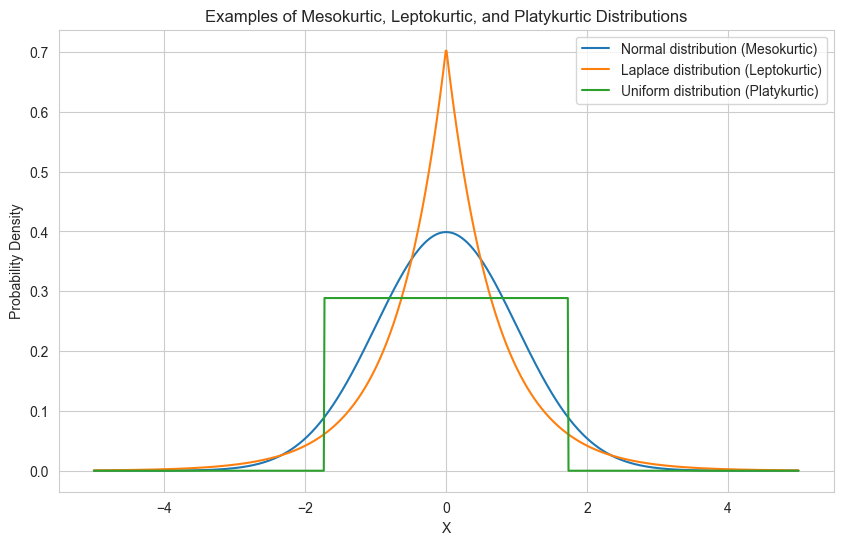

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, laplace, uniform

# Define the distributions
x = np.linspace(-5, 5, 1000)
normal = norm.pdf(x, 0, 1)  # normal distribution, mesokurtic
laplacian = laplace.pdf(x, 0, 1 / np.sqrt(2))  # double exponential distribution, leptokurtic
uniform_pdf = uniform.pdf(x, -np.sqrt(3), 2 * np.sqrt(3))  # uniform distribution, platykurtic

# Create the plots
plt.figure(figsize=(10, 6))
plt.plot(x, normal, label='Normal distribution (Mesokurtic)')
plt.plot(x, laplacian, label='Laplace distribution (Leptokurtic)')
plt.plot(x, uniform_pdf, label='Uniform distribution (Platykurtic)')

# Customize the plot
plt.title('Examples of Mesokurtic, Leptokurtic, and Platykurtic Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()